#### Признаки для изображений

#### Производные признаки

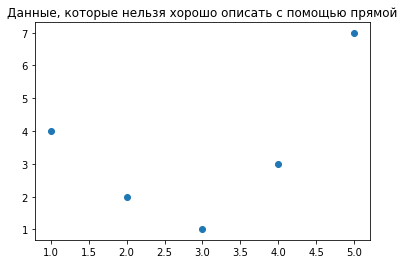

In [1]:
# Данные, которые нельзя хорошо описать с помощью прямой
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])
plt.title("Данные, которые нельзя хорошо описать с помощью прямой")
plt.scatter(x,y);

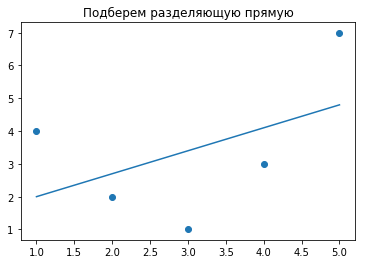

In [2]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X,y)
yfit = model.predict(X)
plt.scatter(x,y)
plt.title("Подберем разделяющую прямую")
plt.plot(x,yfit);

In [3]:
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]
 [ 5. 25.]]


''

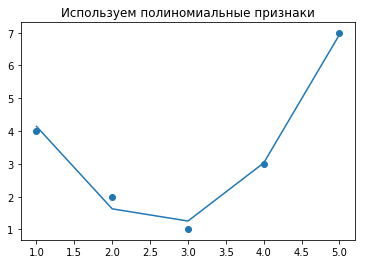

In [5]:
model = LinearRegression().fit(X2,y)
yfit = model.predict(X2)
plt.scatter(x,y)
plt.plot(x,yfit)
plt.title("Используем полиномиальные признаки")
;

In [6]:
# мы не меняли модель, а преобразовали входные данные!

#### Внесение отсутствующих данных (imputation)

In [7]:
from numpy import nan
X = np.array([[nan, 0, 3],
              [3, 7, 9],
              [3, 5, 2],
              [4, nan, 6],
              [8, 8, 1]
             ])
y = np.array([14, 16, -1, 8, -5])

In [8]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [9]:
model = LinearRegression().fit(X2,y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

''

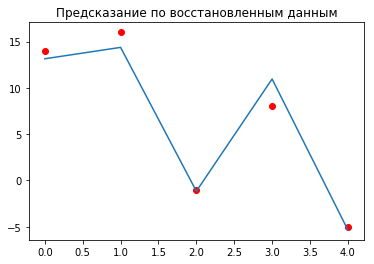

In [10]:
plt.scatter(np.arange(0,5), y, c='red')
plt.plot(model.predict(X2))
plt.title("Предсказание по восстановленным данным")
;

#### Конвейеры признаков

Пример:
    
1. Внести вместо отсутствующих данных средние значения

2. Преобразовать признаки в квадратичные

3. Обучить модель линейной регрессии

In [11]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(Imputer(strategy='mean'),
                     PolynomialFeatures(degree=2),
                     LinearRegression())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
X

array([[nan,  0.,  3.],
       [ 3.,  7.,  9.],
       [ 3.,  5.,  2.],
       [ 4., nan,  6.],
       [ 8.,  8.,  1.]])

In [13]:
model.fit(X,y)
print(y)
print(model.predict(X))
# применяем модель к данным, на которых она училась, что не есть хорошо

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


## Заглянем глубже: наивная байесовская классификация

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#### Гауссов наивный байесовский классификатор 

Данные всех категорий взяты из нормального распределения

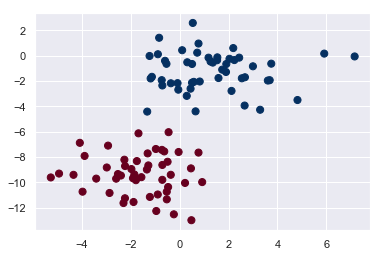

In [15]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu');

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y);

In [17]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

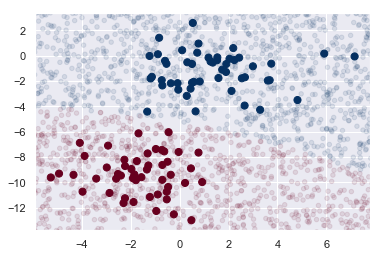

In [18]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:,1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [19]:
yprob = model.predict_proba(Xnew)
yprob.shape

(2000, 2)

In [20]:
print("Апостериорные вероятности первой и второй меток")
yprob[-10:].round(2)

Апостериорные вероятности первой и второй меток


array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

#### Полиномиальный наивный байесовский классификатор

Хорошо подходит для предсказания количества вхождений

In [21]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [22]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 
             'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [25]:
type(train)

sklearn.utils.Bunch

In [26]:
train.data[5]

"From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)\nSubject: Federal Hearing\nOriginator: dmcgee@uluhe\nOrganization: School of Ocean and Earth Science and Technology\nDistribution: usa\nLines: 10\n\n\nFact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the\nuse of the bible reading and prayer in public schools 15 years ago is now\ngoing to appear before the FCC with a petition to stop the reading of the\nGospel on the airways of America.  And she is also campaigning to remove\nChristmas programs, songs, etc from the public schools.  If it is true\nthen mail to Federal Communications Commission 1919 H Street Washington DC\n20054 expressing your opposition to her request.  Reference Petition number\n\n2493.\n"

In [27]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [29]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [30]:
labels

array([2, 0, 1, ..., 1, 2, 1], dtype=int64)

In [31]:
test.target

array([3, 0, 1, ..., 1, 2, 0], dtype=int64)

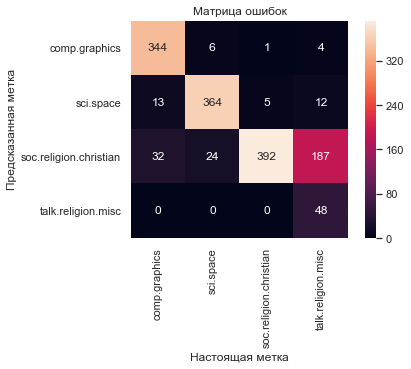

In [39]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('Настоящая метка')
plt.ylabel('Предсказанная метка')
plt.title('Матрица ошибок');

In [40]:
def predict_category(s, train=train, model=model):
    """Вспомогательная функция, 
    возвращающая предсказание для отдельной строки"""
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [41]:
predict_category('sending payload to the ISIS')

'sci.space'

In [42]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [46]:
predict_category('the rocket was launched yesterday')

'sci.space'